In [1]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.22/02


Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enumu_0m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enue_0m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enumubar_0m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enuebar_0m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_5m/Enumu_5m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_5m/Enue_5m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_5m/Enumubar_5m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_5m/Enuebar_5m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_10m/Enumu_10m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_10m/Enue_10m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_10m/Enumubar_10m.png has been created
Info in <TCanvas::Print>: png file Flux_NDGAr_PRI

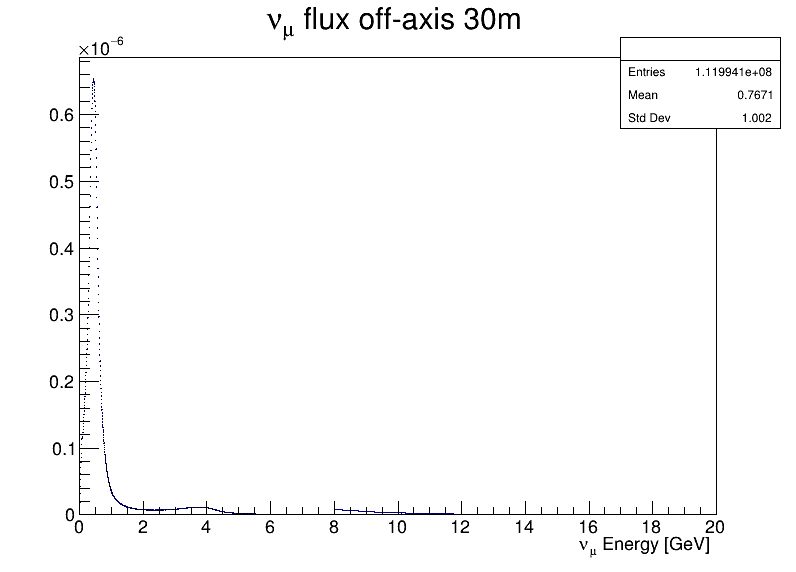

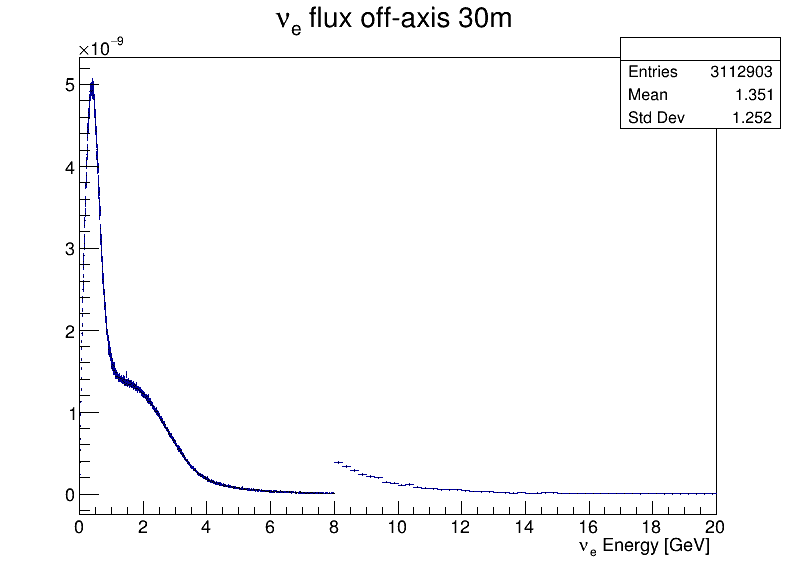

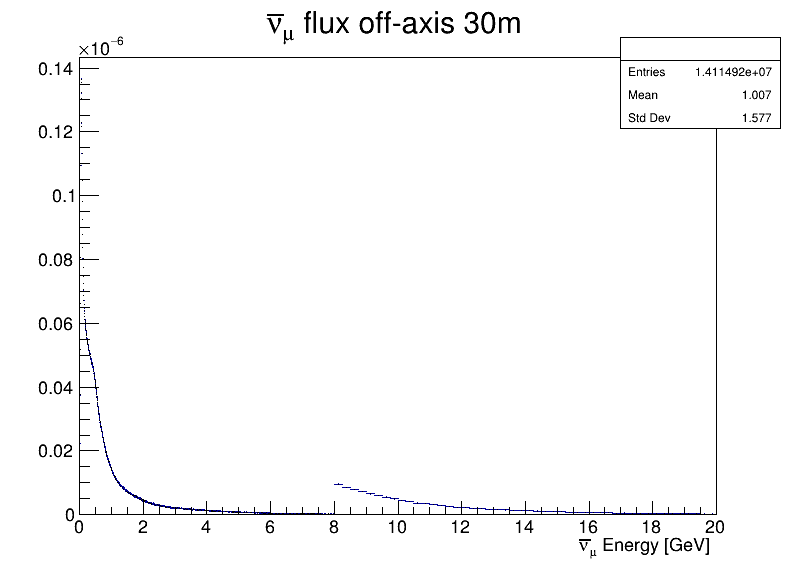

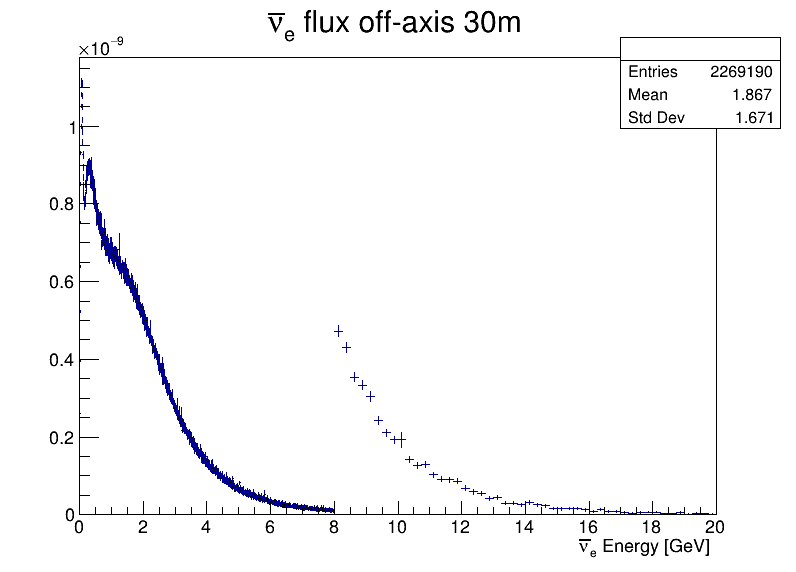

In [2]:
filename="/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/histos_g4lbne_v3r5p9_QGSP_BERT_OfficialEngDesignSept2021_neutrino_GAr_center.root"
file = ROOT.TFile(filename)


histonumu = file.Get("Unosc_numu_flux_DUNEPRISM_GAr_center") 
histonue = file.Get("Unosc_nue_flux_DUNEPRISM_GAr_center") 
histonumubar = file.Get("Unosc_numubar_flux_DUNEPRISM_GAr_center") 
histonuebar = file.Get("Unosc_nuebar_flux_DUNEPRISM_GAr_center") 



for i in range(7):

    offaxis= (i)*5 #distance offaxis in meters
    nbin = offaxis*20+81  #correspondent bin to off-axis position

    Folder = "Flux_NDGAr_PRISM_"+str(offaxis)+"m/"
    Filename = Folder+"Flux_NDGAr_PRISM_"+str(offaxis)+"m.dat"
    #print(Filename)
    text_file = open(Filename, "w")
    Filename_numu = Folder+"Flux_NDGAr_numu_PRISM_"+str(offaxis)+"m.dat"
    text_file_numu = open(Filename_numu, "w")
    Filename_nue = Folder+"Flux_NDGAr_nue_PRISM_"+str(offaxis)+"m.dat"
    text_file_nue = open(Filename_nue, "w")
    Filename_numubar = Folder+"Flux_NDGAr_numubar_PRISM_"+str(offaxis)+"m.dat"
    text_file_numubar = open(Filename_numubar, "w")
    Filename_nuebar = Folder+"Flux_NDGAr_nuebar_PRISM_"+str(offaxis)+"m.dat"
    text_file_nuebar = open(Filename_nuebar, "w")
    

        
    histonumuoff = histonumu.ProjectionX("",nbin,nbin,"").Clone() 
    histonueoff = histonue.ProjectionX("",nbin,nbin,"").Clone()
    histonumubaroff = histonumubar.ProjectionX("",nbin,nbin,"").Clone()
    histonuebaroff = histonuebar.ProjectionX("",nbin,nbin,"").Clone()

    histonumu.GetXaxis().SetRangeUser(0,20)
    histonue.GetXaxis().SetRangeUser(0,20)
    histonumubar.GetXaxis().SetRangeUser(0,20)
    histonuebar.GetXaxis().SetRangeUser(0,20)


    Canvasnumu = "Enumu"+str(offaxis)
    cEnumu = ROOT.TCanvas(Canvasnumu,Canvasnumu,800,600)
    Title = "#nu_{#mu} flux off-axis "+str(offaxis)+"m"
    histonumuoff.SetTitle(Title)
    histonumuoff.Draw()
    cEnumu.Draw()
    save=Folder+"Enumu_"+str(offaxis)+"m.png"
    cEnumu.Print(save)

    Canvasnue = "Enue"+str(offaxis)
    cEnue = ROOT.TCanvas(Canvasnue,Canvasnue,800,600)
    Title = "#nu_{e} flux off-axis "+str(offaxis)+"m"
    histonueoff.SetTitle(Title)
    histonueoff.Draw()
    cEnue.Draw()
    save=Folder+"Enue_"+str(offaxis)+"m.png"
    cEnue.Print(save)

    Canvasnumubar = "Enumubar"+str(offaxis)
    cEnumubar = ROOT.TCanvas(Canvasnumubar,Canvasnumubar,800,600)
    Title = "#bar{#nu}_{#mu} flux off-axis "+str(offaxis)+"m"
    histonumubaroff.SetTitle(Title)
    histonumubaroff.Draw()
    cEnumubar.Draw()
    save=Folder+"Enumubar_"+str(offaxis)+"m.png"
    cEnumubar.Print(save)

    Canvasnuebar = "Enuebar"+str(offaxis)
    cEnuebar = ROOT.TCanvas(Canvasnuebar,Canvasnuebar,800,600)
    Title = "#bar{#nu}_{e} flux off-axis "+str(offaxis)+"m"
    histonuebaroff.SetTitle(Title)
    histonuebaroff.Draw()
    cEnuebar.Draw()
    save=Folder+"Enuebar_"+str(offaxis)+"m.png"
    cEnuebar.Print(save)



    for iev in range(histonumuoff.GetNbinsX()):
        if iev==0 : continue
        width = histonumuoff.GetBinWidth(iev)   

        totnumu=histonumuoff.GetBinContent(iev)
        totnue=histonueoff.GetBinContent(iev)
        totnumubar=histonumubaroff.GetBinContent(iev)
        totnuebar=histonuebaroff.GetBinContent(iev)
        textfile_l = str(histonumuoff.GetBinLowEdge(iev+1))+" "+str(totnue)+" "+str(totnumu)+" "+str(0.0)+" "+str(totnuebar)+" "+str(totnumubar)+" "+str(0.0)+"\n"
        text_file.write(textfile_l)
        text_file_numu_l=str(histonumuoff.GetBinLowEdge(iev+1))+" "+str(totnumu)+"\n"
        text_file_numu.write(text_file_numu_l)
        text_file_nue_l = str(histonumuoff.GetBinLowEdge(iev+1))+" "+str(totnue)+"\n"
        text_file_nue.write(text_file_nue_l)
        text_file_numubar_l = str(histonumuoff.GetBinLowEdge(iev+1))+" "+str(totnumubar)+"\n"
        text_file_numubar.write(text_file_numubar_l)
        text_file_nuebar_l = str(histonumuoff.GetBinLowEdge(iev+1))+" "+str(totnuebar)+"\n"
        text_file_nuebar.write(text_file_nuebar_l)
        #print(str(histonumuoff.GetBinLowEdge(iev+1))+" "+str(totnuebar)+"\n")

    text_file.close()
    text_file_numu.close()
    text_file_nue.close()
    text_file_nuebar.close()
    text_file_numubar.close()
    